## Introduction to Line Search Descent Methods for Unconstrained Minimization

In the *line search descent methods* (look into the book by Snyman and Wilke), the optimization technique picks a direction $\mathbb{\delta_j}$ to begin with, for the $j^{th}$ step and carries out a search along this direction from the previous experimental point, to generate a new iterate. The iterative process looks like:
\begin{equation}
    \mathbb{x}_j = \mathbb{x}_{j-1}+\beta_{j}\mathbb{\delta}_j, \mathbb{x} \in \mathbb{R}^n \label{eq:1}\tag{1}
\end{equation}

Here, $\beta_j$ is a positive scalar number at the $j^{th}$ step , called the *step length*. The performance of a line search descent algorithm depends on the selection of both the *step length* $\beta_j$ and the descent direction $\mathbb{\delta}_j$. The condition for selecting the direction $\mathbb{\delta}_j$for the next iterate :

\begin{equation}
\nabla^T f(\mathbb{x}_{j-1})\mathbb{\delta}_j < 0 \label{eq:2}\tag{2}
\end{equation}
i.e, the directional derivative in the direction $\mathbb{\delta}_j$ should be negative. The step length $\beta_j$ is computed by solving the one dimensional optimization problem formulated as:
\begin{equation}
    \underset{\beta_j > 0}{\min} \tilde{f}(\beta_j) = \underset{\beta_j > 0}{\min} f(\mathbb{x}_{j-1} + \beta_j \mathbb{\delta}_j) \label{eq:3}\tag{3}
\end{equation}

## Selection of Step Length

While finding a suitable step length $\beta_j$ at the $j^{th}$ iteration, we should keep in mind that the choice should be such that there is an acceptable reduction in the objective function value. We work towards solving a minimization task formulated as:

\begin{equation}
    \tilde{f}(\beta) = f(\mathbb{x}_{j-1} + \beta\mathbb{\delta}_j),\ \  \beta > 0 \label{eq:4}\tag{4}
\end{equation}

The algorithm should be designed in such a way that too many computations of the objective function and its gradient should be avoided. This can be achieved by performing *inexact* line searches, to compute the local minimizer of $\tilde{f}$. As we discussed earlier, there should be a condition for choosing $\beta_j$ at each iterate. The condition:

\begin{equation}
    f(\mathbb{x}_j) > f(\mathbb{x}_{j-1} + \beta_j\mathbb{\delta}_j) \label{eq:5}\tag{5}
\end{equation}

does not suffice alone. We need to have a sufficient decrease condition known as the *wolfe conditions*.

### The Wolfe Conditions

The step length $\beta_j$, chosen at each iteration, must result in a *sufficient decrease* in the objective function $f(\mathbb{x})$ given by:

\begin{equation}
    f(\mathbb{x}_{j-1} +\beta_j\mathbb{\delta}_j) \leq f(\mathbb{x}_j) + \alpha_1 \beta_j\nabla^Tf(\mathbb{x}_j)\mathbb{\delta}_j,\ \ \ \ \alpha_1 \in (0, 1) \label{eq:6}\tag{6}
\end{equation}

This is also called the *Armijo condition*. Practically, the value of $\alpha_1$ should be very small, for example in the order of $10^{-4}$. But the *Armijo condition* itself is not enough to guarantee a reasonable progress in the algorithm. To avoid unacceptably short step lengths, there is another condition given by:
\begin{equation}
    \nabla^Tf(\mathbb{x}_{j-1} + \beta_j\mathbb{\delta}_j)\mathbb{\delta}_j \geq \alpha_2\nabla^Tf(\mathbb{x}_{j-1})\mathbb{\delta}_j,\ \ \ \ \alpha_2 \in (\alpha_1, 1) \label{eq:7}\tag{7}
\end{equation}

This is also called the *curvature condition*. Practically $\alpha_2$ is chosen between $0.1 - 0.9$ depending on the algorithms we consider. Eq.\eqref{eq:6} and Eq.\eqref{eq:7} together form the *Wolfe conditions*. Further more, the *curvature condition* can be modified to steer away from cases where a step length might satisfy the *Wolfe conditions* without being close to the minimizer of $\tilde{f}(\beta)$. The modified version of Eq.\eqref{eq:7} can be written as:
\begin{equation}
    |\nabla^Tf(\mathbb{x}_{j-1} + \beta_j\mathbb{\delta}_j)\mathbb{\delta}_j| \leq \alpha_2|\nabla^Tf(\mathbb{x}_{j-1})\mathbb{\delta}_j| \label{eq:8}\tag{8}
\end{equation}
So, Eq.\eqref{eq:6} and Eq.\eqref{eq:7} together form the *strong Wolfe conditions*. For the *strong Wolfe conditions* the term $\nabla^Tf(\mathbb{x}_{j-1} + \beta_j\mathbb{\delta}_j)\mathbb{\delta}_j$ is no longer ``too positive'' unlike the case for the *Wolfe conditions*. 

This concept has been originally introduced in the classic book by Nocedal and Wright.

### An Example

Let us consider the *Himmelblau's function* as the objective function, given by,
\begin{equation}
    f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2 \label{eq:9}\tag{9}
\end{equation}

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy
def himm(x): # Objective function
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
grad_himm = grad(himm) # Gradient of the objective function

We will now plot the objective function.

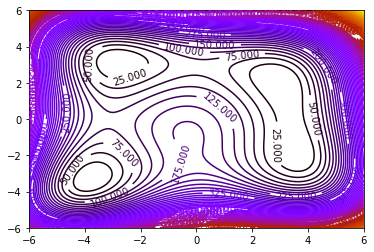

In [3]:
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = himm([x[i], y[j]])
contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.show()

We will use the `line_search()` function from the `scipy.optimize` module which is a Python implementation of the *step-length selection algorithm*. The attributes for the `line_search()` function can be studied in detail from the `scipy` official document. Now, for our example, we enter the values of the starting point, the descent direction, the constants $\alpha_1$ and $\alpha_2$ and the upper bound on the step lengths for the `scipy.optimize.line_search()` and print the results.

In [4]:
from scipy.optimize import line_search
start_point = np.array([-2.5, 2.8])
delta = np.array([-2.5, -1])
alpha_1 = 10**-4
alpha_2 = 0.325
beta_max = 0.6
res=line_search(f = himm, myfprime = grad_himm, xk = start_point, pk = delta, c1 = alpha_1, c2 = alpha_2, amax = beta_max)
res

(0.04234665754870197,
 4,
 1,
 6.112599989468139,
 6.5581000000000005,
 array([ 11.13041873, -24.97823686]))

We see that the optimized step length is $\sim 0.04$, the number of function evaluations made is $4$, the number of gradient evaluations made is $1$, the function value at the new step length is $\tilde{f(\beta)}\sim 6.11$, the function value at the starting point is $\sim 6.56$ and the local slope along the descent direction is $\sim \begin{bmatrix} 11.13 \\ -25 \end{bmatrix}$.

## First Order Line Search Gradient Descent Method: The Steepest Descent Algorithm

Optimization methods that use the gradient vector $\nabla^Tf(\mathbb{x})$ to compute the descent direction $\mathbb{\delta}_j$ at each iteration, are referred to as the *first order line search gradient descent methods*. We will discuss the *steepest descent algorithm* that falls under this category. It is also called the *Cauchy method*, as it was first introduced by the french mathematician Cauchy in 1847.

Now, we explore, how to select the direction of the *steepest descent algorithm*. At the iterate $\mathbb{x}_{j-1}$, the direction of the steepest descent, given by the unit vector $\mathbb{\delta}_j$ is chosen, such that the directional derivative $\nabla^Tf(\mathbb{x}_{j-1})\mathbb{\delta}_j$ takes a minimum value for all possible values of $\mathbb{\delta}_j$ at $\mathbb{x}_{j-1}$. Now, using Schwartz's inequality,
\begin{equation}
    \nabla^Tf(\mathbb{x}_{j-1})\mathbb{\delta}_j \geq - \|\nabla^Tf(\mathbb{x}_{j-1})\|\|\mathbb{\delta}_j\| \geq - \|\nabla^Tf(\mathbb{x}_{j-1})\| \label{eq:10}\tag{10}
\end{equation}

The value $- \|\nabla^Tf(\mathbb{x}_{j-1})\|$ is the minimum value. Now, from the first and the third terms in the Eq.\eqref{eq:10}, we can write,
\begin{equation}
    \mathbb{\delta}_j = -\frac{\nabla f(\mathbb{x}_{j-1})}{\|\nabla f(\mathbb{x}_{j-1})\|} \label{eq:11}\tag{11}
\end{equation}

The expression in Eq.\eqref{eq:11} is the *normalised direction of the steepest descent algorithm*.

### An Example

Let us again consider Himmelblau's function as the objective function, given by,
\begin{equation}
    f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2 \nonumber
\end{equation}

The function has four local minima:

* $f(3., 2.) = 0$,
* $f(-2.8051, 3.1313) = 0$,
* $f(-3.7793, -3.2831) = 0$, and
* $f(3.5844, -1.8481) = 0$.

We will find one of these local minima of Himmelblau's function, using the *steepest descent algorithm* in Python. Let the starting iterate be $\mathbb{x}_j = \begin{bmatrix}1.1 \\ 2.2\end{bmatrix}$, the tolerances be $\epsilon_1 = \epsilon_2 = \epsilon_3 = 10^{-5}$, and the constants to be used in determining the step length using the *strong Wolfe conditions* be $\alpha_1 = 10^{-4}$ and $\alpha_2=0.212$. Let us rewrite Himmelblau's function and its gradient in Python:


In [5]:
def func(x): # Objective function (Himmelblau's function)
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
Df = grad(func) # Gradient of the objective function

We will use `numpy`'s `linalg.norm()` function for calculating the norm of a vector or a matrix.

In [6]:
NORM = np.linalg.norm

Next, we visualize the objective function on a two dimensional space identical to the one that we already generated above, for setting up an environment to visualize the trajectory of the optimization. And finally, we write the Python function `steepest_descent()` implementing the *steepest descent algorithm*:


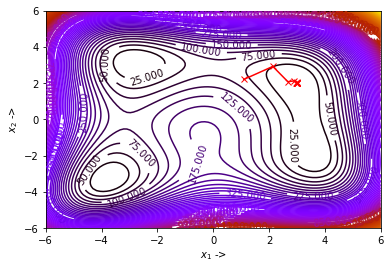

(array([2.99995879, 2.00033681]), 1.7139960678005175e-06)

In [8]:
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
def steepest_descent(Xj, tol_1, tol_2, tol_3, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    while True:
        D = Df(Xj)
        delta = - D / NORM(D) # Selection of the direction of the steepest descent
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(X - Xj) < tol_1 and NORM(Df(X)) < tol_2 or abs(func(X) - func(Xj)) < tol_3:
            x1 += [X[0], ]
            x2 += [X[1], ]
            plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            plt.show()
            return X, func(X)
        else:
            Xj = X
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

steepest_descent(np.array([1.1, 2.2]), 10**-5, 10**-5, 10**-5, 10**-4, 0.212)

We see that for our choice of parameters, the algorithm has converged to the minimizer $\mathbb{x}^* \sim \begin{bmatrix} 3 \\ 2 \end{bmatrix}$ for our objective function, where the function value is $0$. The optimization data has been collected and shown below:


In [10]:
import pandas as pd
def steepest_descent(Xj, tol_1, tol_2, tol_3, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    F = [func(Xj)]
    DF = [NORM(Df(Xj))]
    while True:
        #print("X =", Xj, "f(X)=", f(Xj), "Df(X)=", Df(Xj))
        D = Df(Xj)
        delta = - D / NORM(D) # Selection of the direction of the steepest descent
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(X - Xj) < tol_1 and NORM(Df(X)) < tol_2 or abs(func(X) - func(Xj)) < tol_3:
            x1 += [X[0], ]
            x2 += [X[1], ]
            F += [func(X)]
            DF += [NORM(Df(X))]
            data = {'x_1': x1,
            'x_2': x2,
            'f(X)': F,
            '||grad||': DF}
            return data
        else:
            Xj = X
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            F += [func(Xj)]
            DF += [NORM(Df(Xj))]
            d1 = - Df(Xj) / NORM(Df(Xj))
                                                           
#steepest_descent(np.array([5., -2.1]), 10**-5, 10**-5, 10**-5, 10**-4, 0.325)
data = steepest_descent(np.array([1.1, 2.2]), 10**-5, 10**-5, 10**-5, 10**-4, 0.212)
#steepest_descent(np.array([-6., 4.1]), 10**-5, 10**-5, 10**-5, 10**-4, 0.5)
df = pd.DataFrame(data, columns = ['x_1', 'x_2', 'f(X)', '||grad||'])

df

,x_1,x_2,f(X),||grad||
0,1.100000,2.200000,58.731700,43.151226
1,2.138859,2.916870,25.609491,42.177972
2,2.677577,2.074384,3.084612,19.202701
3,2.907447,2.119179,0.341516,4.878191
4,3.002014,2.062072,0.070095,2.644859
5,2.979348,2.025701,0.016420,1.107003
6,2.998520,2.016583,0.004301,0.584801
7,2.994366,2.006496,0.001160,0.306008
8,2.999485,2.004542,0.000315,0.153945
9,2.998461,2.001736,0.000085,0.084014


We can further experiment by changing the parameters, for example, the initial iterate and/or the constants for the *strong Wolfe conditions* and try to visualize the optimization steps and check for any errors that might arise.


## Conjugate Gradient Methods

The performance of the *steepest descent algorithm* is often not up the mark, generating a zigzag path of steps decreasing in size. This leads to a slow convergence of the problem at hand when the decision variables are poorly scaled. The algorithm might not always efficiently converge within a finite number of steps. This inefficient convergence also happens when the algorithm works on a positive-definite quadratic objective functions for some starting points $\mathbb{x}_0$. To overcome the mentioned inefficiencies, we will introduce another class of first order line search gradient descent algorithms called the *conjugate gradient algorithms*, which will always converge to the minimizer of the given objective function within finite number of iterations, irrespective of the scaling of the decision variables. The *conjugate gradient methods* form an important class of algorithms and we will dedicate our next chapter discussing this class of methods.

## Second Order Line Search Gradient Descent Method

Previously, we have introduced the *first order line search gradient descent method*. We will now study methods which uses the Hessian of the objective function, $\mathbb{H}f(\mathbb{x})$, to compute the line search. At each step, the search is given by,

\begin{equation}
    \mathbb{\delta} = -[\mathbb{H}f]^{-1}(\mathbb{x})\nabla f(\mathbb{x}) \label{eq:12}\tag{12}
\end{equation}

The *Newton's method* for a nonlinear objective function of a single variable has already been introduced in before, as given by Eq.\eqref{eq:12}. So, for a multivariate objective function, it modifies to 
\begin{equation}
    \mathbb{x}_j = \mathbb{x}_{j-1} - [\mathbb{H}f]^{-1}(\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}),\ j=1, 2, \ldots \label{eq:13}\tag{13}
\end{equation}

This is used for solving the problem $\nabla f(\mathbb{x})=0$ iteratively, given the starting iterate $\mathbb{x}_0$ is provided. As we have already discussed in the last chapter, the *Newton's method* follows quadratic convergence. But convergence is not always guaranteed even from an iterate close to the minimizer, since the Hessian given by $\mathbb{H}f(\mathbb{x})$ may not always be positive definite. Now, to overcome this problem, the search given by Eq.\eqref{eq:12} is instead used as a descent direction in our *line search descent direction*. At the $j^{th}$ step, the descent direction is thus given by,
\begin{equation}
    \mathbb{\delta}_j = -[\mathbb{H}f]^{-1}(\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}) \label{eq:14}\tag{14}
\end{equation}

Finally, the step length $\beta_j$ is selected after solving the one dimensional optimization task. This modified version is known as the *modified Newton's method*. 

### An Example 

Let us consider Beale's function as the objective function, having the form,
\begin{equation}
    f(x_1, x_2) = (1.5 - x_1(1-x_2))^2 + (2.25 - x_1(1-x_2^2))^2 + (2.625 - x_1(1-x_2^3))^2\label{eq:15}\tag{15}
\end{equation}
The function has one global minimizer, $f(3, 0.5) = 0$. We will implement the *modified Newton algorithm* in Python and figure out the minimizer of the objective function for some input parameters. Let the starting iterate be $\mathbb{x}_j = \begin{bmatrix}1.8 \\ 0.8 \end{bmatrix}$ , the tolerances be $\epsilon_1=\epsilon_2=\epsilon_3=10^{-5}$ and the constants to be used in determining the step length using the *strong Wolfe conditions* be $\alpha_1=10^{-4}$ and $\alpha_2=0.25$. First we define Beale's function, its gradient and its Hessian using Python's `autograd` package.




In [12]:
def func(x): # Objective function (Beale's function)
    return (1.5 - x[0]*(1-x[1]))**2 + (2.25-x[0]*(1-x[1]**2))**2+(2.625-x[0]*(1-x[1]**3))**2
Df = grad(func) # Gradient of the objective function
Hf = jacobian(Df) # Hessian of the objective function

def modified_newton(Xj, tol_1, tol_2, tol_3, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    while True:
        D = Df(Xj)
        inv_hess = np.linalg.inv(Hf(Xj)) # Compute the inverse of the Hessian at the given iterate
        delta = -inv_hess.dot(D) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(X - Xj) < tol_1 and NORM(Df(X)) < tol_2 or abs(func(X) - func(Xj)) < tol_3:
            x1 += [X[0], ]
            x2 += [X[1], ]
            return X, func(X)
        else:
            Xj = X
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            
modified_newton(np.array([1.8, 0.8]), 10**-5, 10**-5, 10**-5, 10**-4, 0.25)

(array([3.00000125, 0.5000004 ]), 4.2741763276346537e-13)

We notice that, for our choice of parameters, the algorithm has converged to the minimizer $\mathbb{x}^* \sim \begin{bmatrix}3 \\ 0.5\end{bmatrix}$ and the function value at the minimizer is $\sim 0$. The optimization data has been collected and shown below:


In [13]:
from scipy.optimize import line_search
NORM = np.linalg.norm # Function that gives norm of a vector
def func(x): # Objective function (Beales's function)
    return (1.5 - x[0]*(1-x[1]))**2 + (2.25-x[0]*(1-x[1]**2))**2+(2.625-x[0]*(1-x[1]**3))**2
    
Df = grad(func) # Gradient of the objective function
Hf = jacobian(Df)
def modified_newton(Xj, tol_1, tol_2, tol_3, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    F = [func(Xj)]
    DF = [NORM(Df(Xj))]
    while True:
        D = Df(Xj)
        inv_hess = np.linalg.inv(Hf(Xj))
        delta = -inv_hess.dot(D) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(X - Xj) < tol_1 and NORM(Df(X)) < tol_2 or abs(func(X) - func(Xj)) < tol_3:
            x1 += [X[0], ]
            x2 += [X[1], ]
            F += [func(X)]
            DF += [NORM(Df(X))]
            data = {'n':range(1, len(x1)+1),
            'x_1': x1,
            'x_2': x2,
            'f(X)': F,
            '||grad||': DF}
            return data
        else:
            Xj = X
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            F += [func(Xj)]
            DF += [NORM(Df(Xj))]
data=modified_newton(np.array([1.8, 0.8]), 10**-5, 10**-5, 10**-5, 10**-4, 0.25)
df = pd.DataFrame(data, columns = ['x_1', 'x_2', 'f(X)', '||grad||'])

df

,x_1,x_2,f(X),||grad||
0,1.800000,0.800000,6.916616e+00,25.619282
1,3.546377,0.634246,5.839909e-02,2.484670
2,3.235222,0.545634,8.557837e-03,0.473631
3,2.982797,0.494168,1.012821e-04,0.069924
4,3.000484,0.500196,1.689296e-07,0.003555
5,3.000001,0.500000,4.274176e-13,0.000004


We notice that in *Newton method* and the *modified Newton method*, there are requirements to compute the Hessian matrix $\mathbb{H}f(\mathbb{x})$ and also solve a $n \times n$ linear system of equations: $\mathbb{H}f(\mathbb{x})(\mathbb{x}_j - \mathbb{x}_{j-1}) = -\nabla f(\mathbb{x})$ at each iterate $j$. These will lead to computationally expensive evaluations for large $n$, the reason being that an order $n^3$ multiplication computations are required during numerically solving the system of equations. To avoid these computational difficulties methods called *quasi-Newton methods* have been developed which takes into account approximations of the inverse of the Hessian rather than the original inverse at each step. We will dedicate a separate chapter too in studying *quasi-Newton* methods.


We now move on to the next chapter where we study *conjugate gradient methods* in more detail.